In [1]:
import ML_functions as mlf
import pandas as pd
from scipy.spatial.distance import cdist

In [5]:
# some lat/long pairs for testing:
# get_geo_json('ML', 'timbuktu')        # 21.488625, -3.859508
# get_geo_json('IN', 'kolkata')         # 22.51829, 88.362951
# get_geo_json('US', 'San Francisco')   # 37.778008, -122.431272
# get_geo_json('us', 'chicago')         # 41.87897,-87.66063
# get_geo_json('ru', 'moscow')          # 55.741469, 37.615561


latitude = 37.778008
longitude = -122.431272

timbuktu_df = mlf.step1(latitude, longitude, 2001, 2020)

In [6]:
num_pca = 20
klist = [5,5,5,6,6,6,7,7,7]
wlist = [0.13, 0.14, 0.15]*3

timbuktu_modes = mlf.predictions(timbuktu_df, num_pca, klist, wlist, 1)
# timbuktu_modes

5 principal components explain 0.8519329497046617
6 principal components explain 0.8874724917006176
7 principal components explain 0.9153998849496386
8 principal components explain 0.9359077802956607
9 principal components explain 0.9532115526916783


In [7]:
deek = mlf.smooth_seasons(timbuktu_df, timbuktu_modes)

[(123.33070004105653, 'season k5 w0.13 r1'), (123.33070004105653, 'season k5 w0.14 r1'), (150.63158266892555, 'season k5 w0.15 r1'), (210.88315099111395, 'season k6 w0.13 r1'), (114.243701540703, 'season k6 w0.14 r1'), (130.65403414782523, 'season k6 w0.15 r1'), (99.47505125521153, 'season k7 w0.13 r1'), (98.26448996254439, 'season k7 w0.14 r1'), (98.26448996254439, 'season k7 w0.15 r1')]


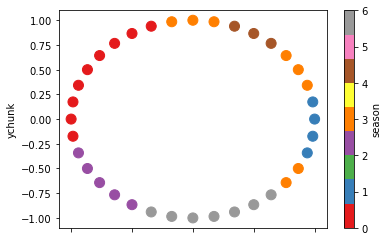

In [8]:
mlf.plot_labels(deek['labels'])

In [9]:
pd.set_option("display.max_columns", None)
daf = deek['stats'].copy()
daf.rename({'precipitation_hours_avg': 'precip_hrs_avg',
            'precipitation_hours_dev': 'precip_hrs_dev'}, axis=1, inplace=True)
daf[daf['temp_max_avg'] > 0]

,humid_avg_avg,wind_high_avg,median_wind_avg,cloud_4_avg,cloud_12_avg,cloud_20_avg,precip_hrs_avg,rain_sum_avg,snowfall_sum_avg,temp_max_avg,temp_min_avg,humid_avg_dev,wind_high_dev,median_wind_dev,cloud_4_dev,cloud_12_dev,cloud_20_dev,precip_hrs_dev,rain_sum_dev,snowfall_sum_dev,temp_max_dev,temp_min_dev
0,79.401559,14.652667,10.541561,11.185960,25.338182,47.438030,0.790606,0.019901,0.0,61.208212,52.145990,6.813334,3.308055,3.074251,15.057373,23.549497,32.047452,1.428059,0.039834,0.0,3.326030,1.744266
1,80.668826,12.504000,7.878006,26.602614,46.938295,67.042045,4.460568,0.170830,0.0,55.289477,46.781591,9.111015,5.232556,3.745377,25.804958,32.253781,31.142690,5.268509,0.253972,0.0,2.256245,3.219575
2,85.057769,12.027545,7.990200,16.221000,33.251636,64.098818,0.033273,0.000464,0.0,63.893609,55.348709,4.333076,2.468820,2.196738,15.236899,20.047651,25.731335,0.100405,0.001423,0.0,2.730597,1.354414
3,79.974403,12.397949,8.004682,19.740057,37.587045,61.967784,3.131534,0.103524,0.0,57.316312,48.236841,8.114142,4.440987,3.470706,22.027941,30.198217,32.099051,4.491695,0.175776,0.0,2.720698,2.607405
4,80.058644,13.362019,8.627373,21.235509,41.418241,67.333981,4.268889,0.153072,0.0,56.284074,47.609111,7.176983,4.558309,3.769655,22.392877,29.617110,30.210227,5.268181,0.233338,0.0,2.859070,2.692318
6,80.355982,11.389864,7.124373,11.404805,25.376818,50.689221,0.863961,0.025771,0.0,64.268409,54.066084,8.169775,3.286705,2.747255,15.317410,24.156875,32.761980,1.480832,0.053583,0.0,3.562765,2.054252


In [18]:
distmat =  mlf.dmatrix(timbuktu_df, deek['labels'], 'season', len(deek['stats']))
pd.set_option('display.precision', 0)
pd.DataFrame(distmat)

,0,1,2,3,4,5,6
0,0,37,21,24,30,108,7
1,37,0,29,14,9,125,36
2,21,29,0,19,21,119,19
3,24,14,19,0,7,118,23
4,30,9,21,7,0,122,29
5,108,125,119,118,122,0,112
6,7,36,19,23,29,112,0


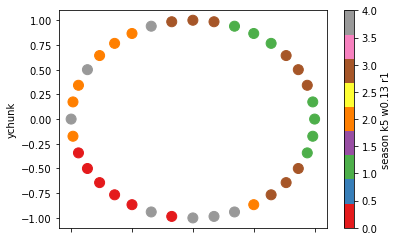

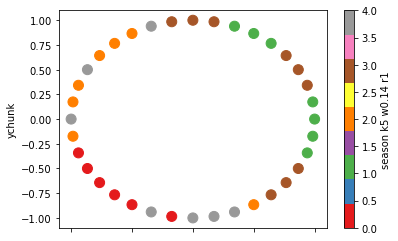

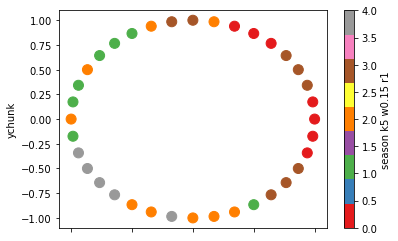

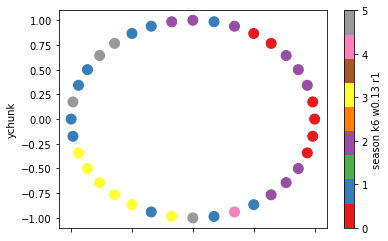

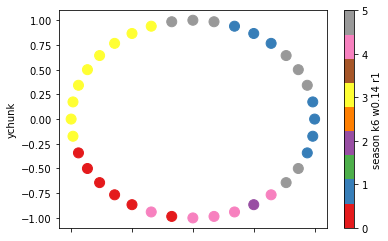

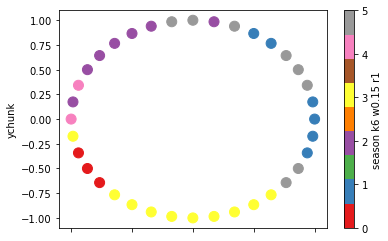

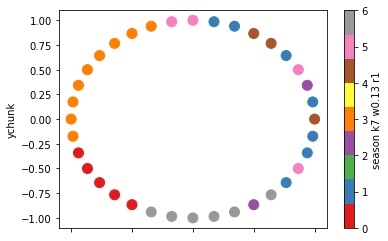

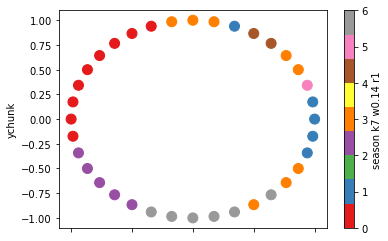

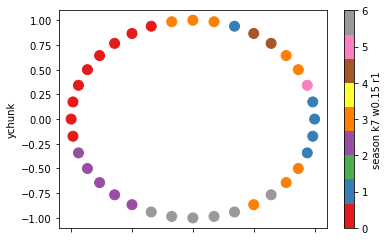

In [10]:
mlf.plot_labels(timbuktu_modes)

In [79]:
def smooth_seasons(unscaled_df, modes):
    smoothest = pick_model(unscaled_df, modes)
    season_labels_df  = modes[['xchunk', 'ychunk']].copy()
    season_labels_df['season'] = smoothest['new_modes']
    season_stats_df = season_avgs(unscaled_df, season_labels_df, 'season', smoothest['k'])
    season_stats_df.drop(['year', 'date_chunk'], axis=1, inplace=True)
    return {'labels': season_labels_df, 'stats': season_stats_df}
 

In [80]:
deek = smooth_seasons(timbuktu_df, timbuktu_modes)

[(63.463446483558926, 'season k5 w0.12 r1'), (31.898076908224372, 'season k5 w0.14 r1'), (64.02984413109259, 'season k5 w0.16 r1'), (103.8932062871796, 'season k6 w0.12 r1'), (106.13483832142072, 'season k6 w0.14 r1'), (134.90771962936208, 'season k6 w0.16 r1'), (102.78822929813713, 'season k7 w0.12 r1'), (82.37313649470171, 'season k7 w0.14 r1'), (56.48659285543191, 'season k7 w0.16 r1')]


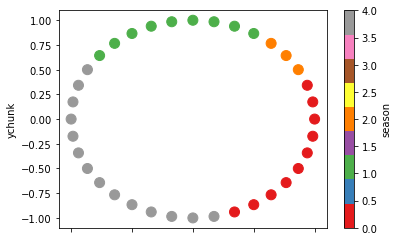

In [83]:
mlf.plot_labels(deek['labels'])

In [68]:
timbuktu_modes

,xchunk,ychunk,season k5 w0.12 r1,season k5 w0.14 r1,season k5 w0.16 r1,season k6 w0.12 r1,season k6 w0.14 r1,season k6 w0.16 r1,season k7 w0.12 r1,season k7 w0.14 r1,season k7 w0.16 r1
date_chunk,,,,,,,,,,,
1,9.848078e-01,1.736482e-01,3,0,3,4,4,4,4,5,3
2,9.396926e-01,3.420201e-01,3,0,3,4,4,4,4,5,3
3,8.660254e-01,5.000000e-01,2,2,0,2,4,4,6,4,4
4,7.660444e-01,6.427876e-01,2,2,0,2,2,4,6,4,4
5,6.427876e-01,7.660444e-01,4,3,4,0,0,0,1,1,4
6,5.000000e-01,8.660254e-01,0,1,2,2,2,4,0,3,5
7,3.420201e-01,9.396926e-01,0,1,0,2,2,2,0,3,4
8,1.736482e-01,9.848078e-01,0,1,2,2,2,2,0,3,5
9,6.123234e-17,1.000000e+00,2,2,0,2,2,2,6,4,4


In [43]:
# getting averages for each season
# to keep indexing straight, entering junk for labels that never occur

def season_avgs(unscaled_df, modes, model_name, k):
    output = pd.DataFrame(columns=unscaled_df.columns)
    zerow = pd.DataFrame(0, index = ['x'], columns=unscaled_df.columns)
    temp_df = modes[[model_name]].reset_index()
    leests = temp_df.groupby(model_name).aggregate(lambda x: tuple(x))
    for i in range(k):
        if i in leests.index.to_list():
            leest = leests['date_chunk'].loc[i]
            desc = unscaled_df[unscaled_df['date_chunk'].isin(leest)].describe()
            new_row = desc[desc.index=='mean']
        else: 
            new_row = zerow.copy()
        new_row.index = [i]
        output = pd.concat([output,new_row])
    return output

In [44]:
# no 1, 6 in 'season k7 w0.16 r1'

season_avgs(timbuktu_df, timbuktu_modes, 'season k7 w0.16 r1', 7)

,year,date_chunk,humid_avg_avg,wind_high_avg,median_wind_avg,cloud_4_avg,cloud_12_avg,cloud_20_avg,precipitation_hours_avg,rain_sum_avg,...,wind_high_dev,median_wind_dev,cloud_4_dev,cloud_12_dev,cloud_20_dev,precipitation_hours_dev,rain_sum_dev,snowfall_sum_dev,temp_max_dev,temp_min_dev
0,2010.5,15.000000,12.676269,15.219212,10.135833,1.824848,5.676667,14.228182,0.039394,0.000412,...,3.672683,2.626418,3.393373,7.884314,13.798934,0.120948,0.001310,0.0,2.993765,3.224141
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,2010.5,21.769231,18.797520,14.807993,9.462629,1.592378,6.115105,16.331469,0.119406,0.002566,...,3.393596,2.423064,2.707555,7.077592,13.073015,0.261927,0.006283,0.0,2.990526,2.546898
3,2010.5,24.125000,24.442872,13.236165,9.765401,5.502443,11.993068,20.486193,0.035455,0.000375,...,2.908021,2.306472,8.363490,13.326155,17.157209,0.082432,0.000910,0.0,3.215866,3.259421
4,2010.5,14.000000,22.750966,14.102636,10.332182,5.329545,11.027273,19.185649,0.076818,0.001368,...,3.454015,2.696642,8.096512,12.385646,17.001659,0.181875,0.003385,0.0,4.223498,4.019729
5,2010.5,9.400000,16.138894,14.192661,9.795661,3.140778,8.158333,15.819944,0.109250,0.001610,...,3.307327,2.382541,5.348298,10.501781,15.376878,0.244825,0.003746,0.0,3.905096,3.660417
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [45]:
# getting distances between seasons, using above

def dmatrix(unscaled_df, modes, model_name, k):
    season_avg_df = season_avgs(unscaled_df, modes, model_name, k)
    season_avg_df.drop(['year','date_chunk'], axis=1, inplace=True)
    # maybe use ‘cityblock’ metric to speed up?
    return cdist(season_avg_df.iloc[:,1:], season_avg_df.iloc[:,1:], metric='euclidean')

In [46]:
dmatrix(timbuktu_df, timbuktu_modes, 'season k7 w0.16 r1', 7)

array([[  0.        , 135.86408439,   5.5449021 ,  32.1632824 ,
         36.40845102,  19.73230479, 135.86408439],
       [135.86408439,   0.        , 139.28474827, 110.26404162,
        105.34361299, 118.47836552,   0.        ],
       [  5.5449021 , 139.28474827,   0.        ,  35.26960832,
         39.71856922,  23.37542093, 139.28474827],
       [ 32.1632824 , 110.26404162,  35.26960832,   0.        ,
          5.83018688,  13.25918014, 110.26404162],
       [ 36.40845102, 105.34361299,  39.71856922,   5.83018688,
          0.        ,  16.86820745, 105.34361299],
       [ 19.73230479, 118.47836552,  23.37542093,  13.25918014,
         16.86820745,   0.        , 118.47836552],
       [135.86408439,   0.        , 139.28474827, 110.26404162,
        105.34361299, 118.47836552,   0.        ]])

In [72]:
# smoothing out one model, using above

def smooth_one(unscaled_df, modes, model_name, k):
    # making two diff lists, for easy wrapping indices
    old_modes = modes[model_name].to_list()
    new_modes = modes[model_name].to_list()
    dist_matrix = dmatrix(unscaled_df, modes, model_name, k)
    # fill in embedded singleton
    for i in range(len(new_modes)):
        if new_modes[i-2] == new_modes[i]:
            new_modes[i-1] = new_modes[i-2]
    # more controversially, "fix" the middle of 3 different consecutive
    # pick the one of the adjacent news closest to the here-original
    for i in range(len(new_modes)):
        if len({new_modes[i-2], new_modes[i-1], new_modes[i]}) == 3:
            if dist_matrix[new_modes[i-2]][old_modes[i-1]] <= \
            dist_matrix[new_modes[i]][old_modes[i-1]]:
                new_modes[i-1] = new_modes[i-2]
            else:
                new_modes[i-1] = new_modes[i]
    # initialize to account for expected boundaries
    guilt = -30*len(set(new_modes))
    for i in range(len(new_modes)):
        guilt += dist_matrix[new_modes[i]][old_modes[i]]
        if new_modes[i-1] != new_modes[i]:
            # each extra boundary is as bad as a distance-30 switch
            guilt += 30
    return {'model_name': model_name, 'new_modes': new_modes, 'guilt': guilt, 'k': k}

In [63]:
# smooth_one(timbuktu_df, timbuktu_modes, 'season k7 w0.16 r1', 7)

In [59]:
def pick_model(unscaled_df, modes):
    models = []
    for colnam in modes.columns:
        if ((colnam == 'xchunk' or colnam == 'ychunk') or colnam == 'date_chunk'):
            pass
        else:
            models.append(smooth_one( unscaled_df, modes, colnam, int(colnam[8]) ))
    print([(x['guilt'], x['model_name']) for x in models])
    models.sort(key= (lambda x: x['guilt']))
    return models[0]

In [62]:
pick_model(timbuktu_df, timbuktu_modes)

[(63.463446483558926, 'season k5 w0.12 r1'), (31.898076908224372, 'season k5 w0.14 r1'), (64.02984413109259, 'season k5 w0.16 r1'), (103.8932062871796, 'season k6 w0.12 r1'), (106.13483832142072, 'season k6 w0.14 r1'), (134.90771962936208, 'season k6 w0.16 r1'), (102.78822929813713, 'season k7 w0.12 r1'), (82.37313649470171, 'season k7 w0.14 r1'), (56.48659285543191, 'season k7 w0.16 r1')]


{'model_name': 'season k5 w0.14 r1',
 'new_modes': [0,
  0,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'guilt': 31.898076908224372}

In [57]:
models = [{'a':1, 'b':2},{'a':10, 'b':20},{'a':11, 'b':12} ]

In [58]:
models.sort(key= (lambda x: x['a']))

In [7]:
'season k7 w0.16 r1'[8]

'7'

In [21]:
model_name = 'season k7 w0.16 r1'
k=7
modes = timbuktu_modes
unscaled_df = timbuktu_df

In [22]:
temp_df = modes[[model_name]].reset_index()
leests = temp_df.groupby(model_name).aggregate(lambda x: tuple(x))
leests

,date_chunk
season k7 w0.16 r1,
0,"(13, 15, 17)"
2,"(14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 2..."
3,"(1, 2, 29, 30, 31, 32, 33, 35)"
4,"(3, 4, 5, 7, 9, 34, 36)"
5,"(6, 8, 10, 11, 12)"


In [26]:
leests['date_chunk'].loc[2]

(14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28)

In [27]:
leests.index.to_list()

[0, 2, 3, 4, 5]

In [47]:
for i in [3,0,1]:
    try:
        print(8/i)
    except:
        continue

2.6666666666666665
8.0


In [51]:

def confusels():
    bob = []
    for i in [3,0,1]:
        try:
            bob.append(8/i)
        except:
            pass
    return(bob)

In [52]:
confusels()

[2.6666666666666665, 8.0]